In [1]:
import pandas as pd
import os
import seaborn as sns

### Merge the 12 months of sales data into a single CSV file

In [2]:
files = [file for file in os.listdir(r'C:\Users\Acer\Desktop\Data Samples\Sales Data')]

all_months = pd.DataFrame()

for file in files:
    df = pd.read_csv(r'C:\Users\Acer\Desktop\Data Samples\Sales Data\\' + file)
    all_months = pd.concat([all_months, df])

In [3]:
all_months

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
all_months.to_csv(r'C:\Users\Acer\Desktop\Data Samples\Sales Data\all_data.csv', index=False)

### Read in updated dataframe

In [5]:
df = pd.read_csv(r'C:\Users\Acer\Desktop\Data Samples\Sales Data\all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean Data

##### Drop rows of NAN

In [6]:
df[df.isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3550145,NaN,NaN,NaN,NaN,NaN,NaN
3550146,NaN,NaN,NaN,NaN,NaN,NaN
3550147,NaN,NaN,NaN,NaN,NaN,NaN
3550148,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum()

Order ID            10355
Product             10355
Quantity Ordered    10355
Price Each          10355
Order Date          10355
Purchase Address    10355
dtype: int64

In [8]:
df.dropna(inplace=True, how='all')

In [9]:
# Dropping rows which contains other table's header
df.drop(df[df['Order ID']=='Order ID'].index, inplace=True)

In [10]:
# Convert columns to correct type
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [11]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

### Augmented data with additional columns

#### Add Month Column and Hour Column 

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format=r'%m/%d/%y %H:%M')

In [13]:
df['Month'] = df['Order Date'].dt.month
df['Month'] = df['Month'].astype('int32')

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


#### Add sales column

In [14]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


#### QUESTIONS:

##### What was the best month for sales? How much was earned that month?

In [15]:
df.groupby('Month').sum().sort_values('Sales', ascending=False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,534166,8.717989e+07,8.765542e+07
10,431357,7.059554e+07,7.099781e+07
4,390602,6.398575e+07,6.442273e+07
11,376162,6.043141e+07,6.079246e+07
5,354673,5.956738e+07,5.989953e+07
3,323095,5.303295e+07,5.333491e+07
7,305368,5.001825e+07,5.030774e+07
6,289807,4.867849e+07,4.897824e+07
8,255512,4.237656e+07,4.264489e+07


In [16]:
import matplotlib.pyplot as plt

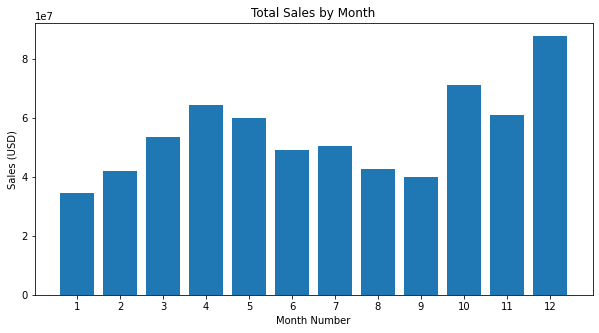

In [17]:
months = range(1,13)

plt.figure(figsize=(10,5))

plt.bar(months, df.groupby('Month').sum()['Sales'])

plt.title('Total Sales by Month')
plt.xticks(months)
plt.ylabel('Sales (USD)')
plt.xlabel('Month Number')

plt.show()

##### What city is the highest number of sales?

In [18]:
# Splitting the city from purchase address and adding a column

#def get_city(address):
#    return address.split(',')[1]

#def get_state(address):
#    return address.split(',')[2].split(' ')[1]

#df['City'] = df['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
#df['City'] = df['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')

df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2].split(' ')[1])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [19]:
city_sale = df.groupby('City').sum().sort_values('Sales', ascending=False)
city_sale

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco CA,954541,1.560178e+08,5994880,1.569819e+08
Los Angeles CA,632491,1.030073e+08,3958175,1.035988e+08
New York City NY,530708,8.807205e+07,3339079,8.862203e+07
Boston MA,428032,6.911079e+07,2681128,6.957120e+07
Atlanta GA,315438,5.281826e+07,1991086,5.311447e+07
Dallas TX,317870,5.229993e+07,1987780,5.259153e+07
Seattle WA,314507,5.193262e+07,1993879,5.220735e+07
Portland OR,214757,3.535061e+07,1341799,3.554391e+07
Austin TX,211907,3.438760e+07,1326751,3.457205e+07


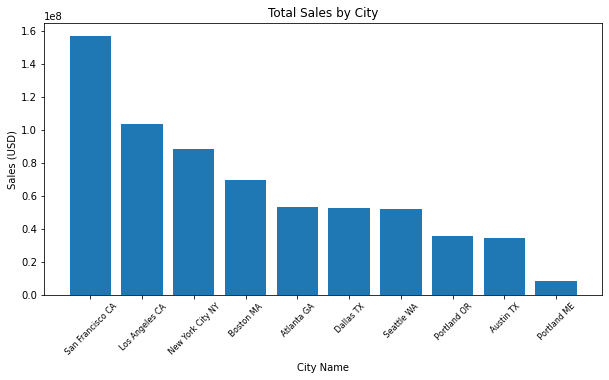

In [20]:
plt.figure(figsize=(10,5))

cities = df['City'].unique()

plt.bar(city_sale.index, city_sale['Sales'])

plt.title('Total Sales by City')
plt.xticks(city_sale.index, rotation=45, size=8)
plt.ylabel('Sales (USD)')
plt.xlabel('City Name')

plt.show()

##### What time should we display ads to maximize customer's buying product?

In [21]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [22]:
df['Hour'].value_counts()

19    245195
12    239153
11    235809
18    233320
20    232332
13    230451
14    208696
10    207936
21    207499
17    207081
16    197296
15    193325
22    167618
9     166212
23    119225
8     118864
7      76209
0      74290
6      47158
1      44650
5      25099
2      23617
4      16226
3      15789
Name: Hour, dtype: int64

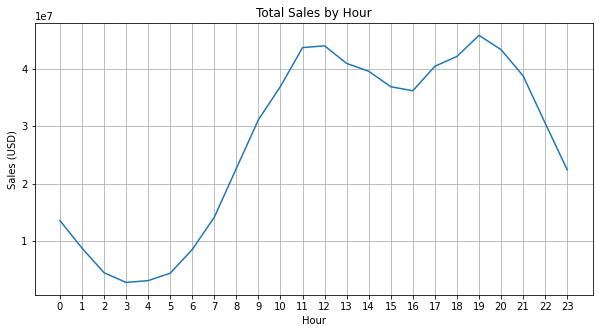

In [23]:
hours = [hour for hour, df in df.groupby('Hour')]

plt.figure(figsize=(10,5))

plt.plot(hours, df.groupby(['Hour']).sum()['Sales'])

plt.title('Total Sales by Hour')
plt.xlabel('Hour')
plt.ylabel('Sales (USD)')
plt.xticks(hours)

plt.grid()
plt.show()

##### What's products are most often sold together?

In [24]:
# Getting all duplicated rows
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df2 = df[df['Order ID'].duplicated(keep=False)]

# Joining values with the same Order ID and make a list in each row
# https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df2 = df2[['Order ID', 'Product']].drop_duplicates()
df2['Grouped'] = df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df2.head()

,Order ID,Product,Grouped
0,176558,USB-C Charging Cable,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,Bose SoundSport Headphones
3,176560,Google Phone,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,Wired Headphones


In [25]:
# Counting most sold pairs
# https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 2127
('Google Phone', 'USB-C Charging Cable') 2106
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 943
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 446
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


In [48]:
prod_sold = df.groupby('Product').sum()['Quantity Ordered'].reset_index().sort_values('Quantity Ordered', ascending=True)

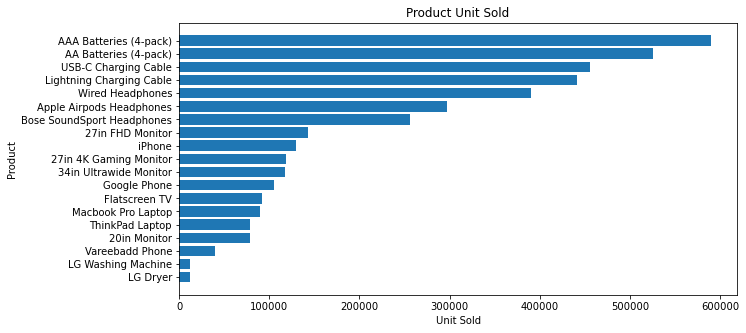

In [50]:
plt.figure(figsize=(10,5))

plt.barh(prod_sold['Product'], prod_sold['Quantity Ordered'])

plt.title('Product Unit Sold')
plt.ylabel('Product')
plt.xlabel('Unit Sold')

plt.show()

In [60]:
top_sales = df.groupby('Product').sum()['Sales'].reset_index().sort_values('Sales', ascending=True)

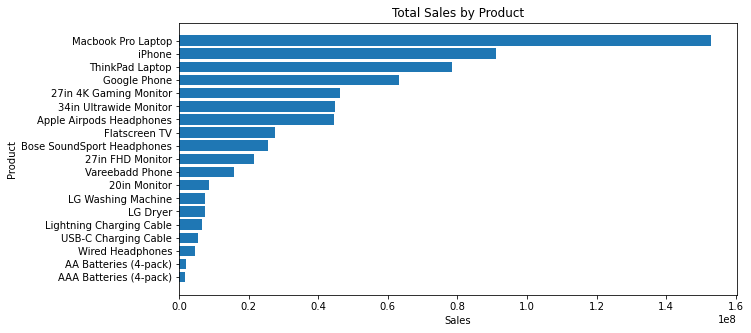

In [64]:
plt.figure(figsize=(10,5))

plt.barh(top_sales['Product'], top_sales['Sales'])

plt.title('Total Sales by Product')
plt.ylabel('Product')
plt.xlabel('Sales')

plt.show()

<ipython-input-72-ee87b4991892>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
<ipython-input-72-ee87b4991892>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


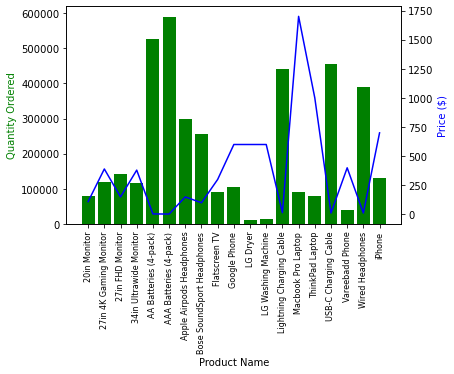

In [72]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = df.groupby('Product').mean()['Price Each']
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
keys = [pair for pair, df in product_group]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

<ipython-input-129-9c9d9960c854>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(prod_sold.index, rotation='vertical')


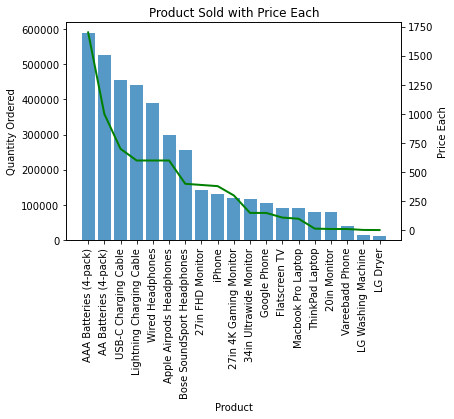

In [129]:
prod_grp = df.groupby('Product')
prod_sold = prod_grp['Quantity Ordered'].sum().sort_values(ascending=False)
prod_price = prod_grp['Price Each'].mean().sort_values(ascending=False)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(prod_sold.index, prod_sold.values, alpha=0.75)
ax2.plot(prod_price.values, alpha=1, c='green', lw=2)

plt.title('Product Sold with Price Each')
ax1.set_xticklabels(prod_sold.index, rotation='vertical')
ax1.set_ylabel('Quantity Ordered')
ax1.set_xlabel('Product')
ax2.set_ylabel('Price Each')

plt.show()